In [68]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
import os
import sys
import utils
key = 'SK_ID_CURR'
target = 'TARGET'

pdp = pd.read_csv('../output/1103_2_xray_lgb_CV0.6759900976327124.csv')

In [70]:
pdp

,Unnamed: 0,N,feature,value,xray_0,xray_1,xray_2,xray_3,xray_4,xray_avg
0,0,1727.0,ir_12@,0.198940,0.059564,0.059564,0.059564,0.059564,0.059564,0.059564
1,1,1732.0,ir_12@,0.142629,0.046036,0.046036,0.046036,0.046036,0.046036,0.046036
2,2,1832.0,ir_12@,0.181331,0.054849,0.054849,0.054849,0.054849,0.054849,0.054849
3,3,1732.0,ir_12@,0.175460,0.063556,0.063556,0.063556,0.063556,0.063556,0.063556
4,4,1720.0,ir_12@,0.229520,0.039274,0.039274,0.039274,0.039274,0.039274,0.039274
5,5,1724.0,ir_12@,0.122000,0.043093,0.043093,0.043093,0.043093,0.043093,0.043093
6,6,1712.0,ir_12@,0.270545,0.055730,0.055730,0.055730,0.055730,0.055730,0.055730
7,7,1885.0,ir_12@,0.240675,0.045857,0.045857,0.045857,0.045857,0.045857,0.045857
8,8,1733.0,ir_12@,0.171164,0.054894,0.054894,0.054894,0.054894,0.054894,0.054894
9,9,1747.0,ir_12@,0.193236,0.062392,0.062392,0.062392,0.062392,0.062392,0.062392


*** ir_12@ ***


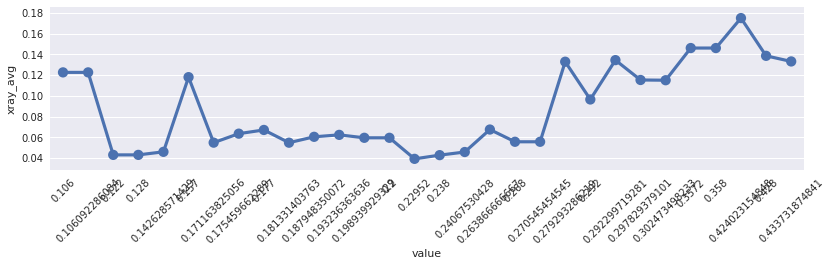

*** ir_15@ ***


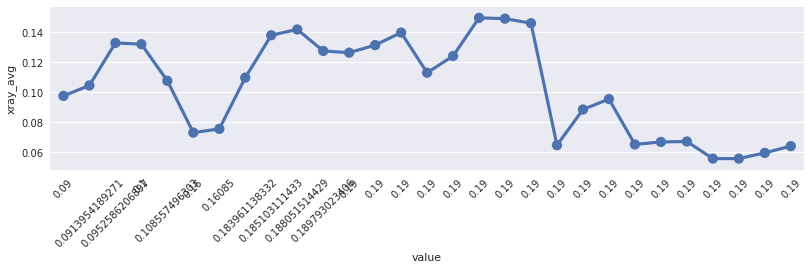

*** ir_18@ ***


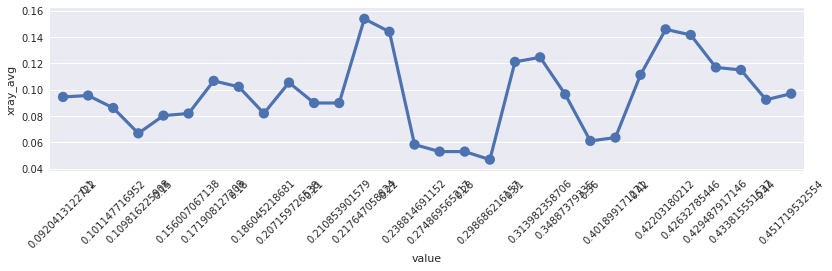

*** ir_21@ ***


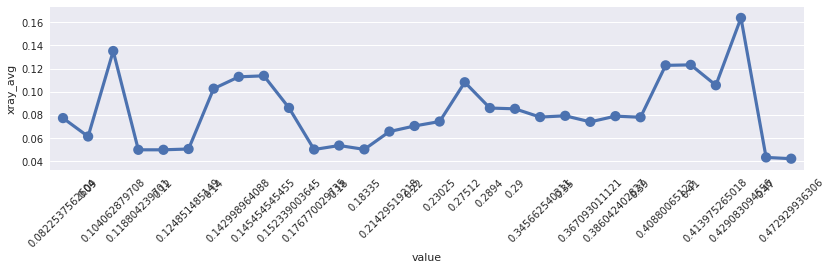

*** ir_24@ ***


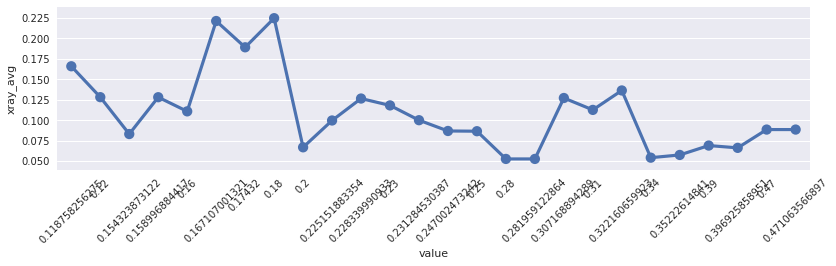

*** ir_33@ ***


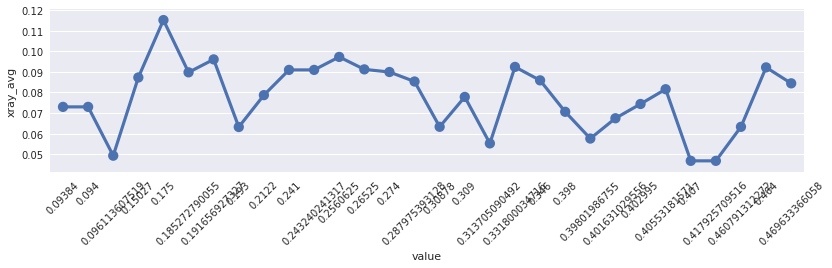

*** ir_36@ ***


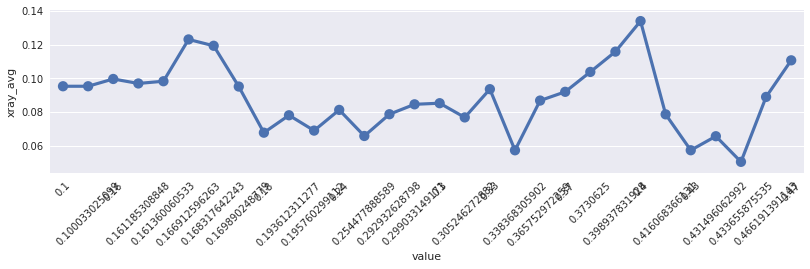

*** ir_pred@ ***


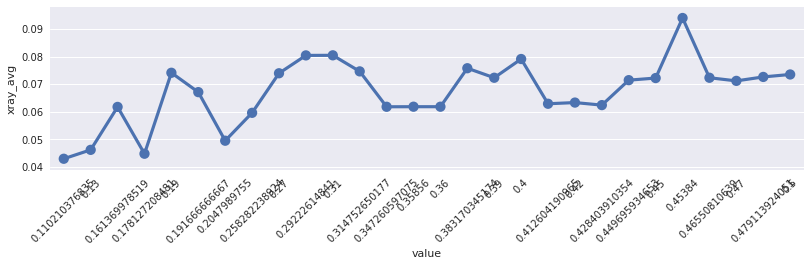

In [73]:
feat_list = pdp['feature'].unique()

for feat in feat_list:
    tmp = pdp[pdp['feature']==feat][['value', 'xray_avg', 'N']]
    tmp.sort_values(by='value', inplace=True)
#     tmp['value'] = tmp['value'].map(lambda x:round(x, 4))
#     sns.lmplot(x='value', y='xray_avg', data=tmp, aspect=3)
    print(f'*** {feat} ***')
    plt.figure(figsize=(13.5,3))
    viz = sns.pointplot(x='value', y='xray_avg' ,data=tmp)
    viz.set_xticklabels(rotation=45, labels=tmp['value'])
    plt.show()
#     plt.figure(figsize=(13.5,3))
#     viz = sns.barplot(x='value', y='N' ,data=tmp)
#     viz.set_xticklabels(rotation=45, labels=tmp['value'])
#     print(f'*** {feat} ***')
#     plt.show()